In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.shape

(7043, 20)

In [16]:
df.iloc[488].TotalCharges

' '

In [18]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [19]:
df1=df[df.TotalCharges!=' ']

In [21]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [23]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [28]:
df1[df["Churn"]=='No']

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\2761047774.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df["Churn"]=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\3834400887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_no=df1[df["Churn"]=='No'].tenure
C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\3834400887.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_yes=df1[df["Churn"]=='Yes'].tenure


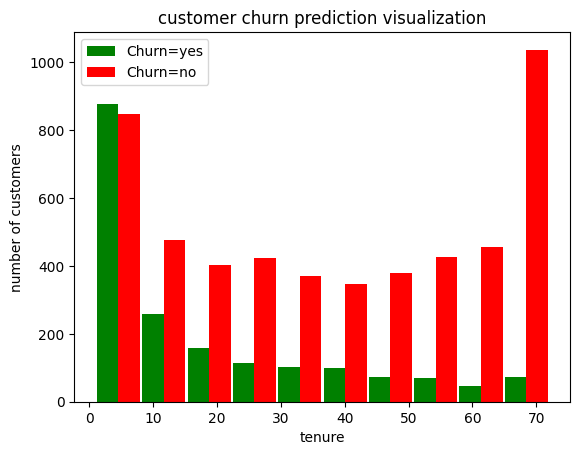

In [34]:
tenure_churn_no=df1[df["Churn"]=='No'].tenure
tenure_churn_yes=df1[df["Churn"]=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title("customer churn prediction visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=yes', 'Churn=no'])
plt.legend()


C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\2894537324.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  monthly_no=df1[df["Churn"]=='No'].MonthlyCharges
C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\2894537324.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  monthly_yes=df1[df["Churn"]=='Yes'].MonthlyCharges


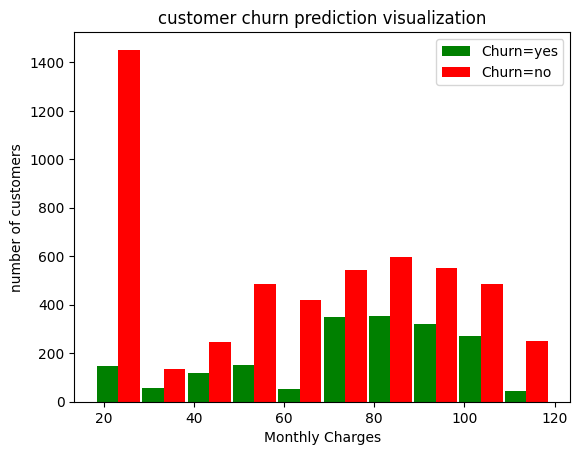

In [35]:
monthly_no=df1[df["Churn"]=='No'].MonthlyCharges
monthly_yes=df1[df["Churn"]=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("number of customers")
plt.title("customer churn prediction visualization")

plt.hist([monthly_yes, monthly_no], rwidth=0.95, color=['green', 'red'], label=['Churn=yes', 'Churn=no'])
plt.legend()


In [40]:
def unique_col_values(df):
    for col in df.columns:
        unique_values = df[col].unique()
        print(f"Column '{col}' has {len(unique_values)} unique values: {unique_values}")
unique_col_values(df1)

Column 'gender' has 2 unique values: ['Female' 'Male']
Column 'SeniorCitizen' has 2 unique values: [0 1]
Column 'Partner' has 2 unique values: ['Yes' 'No']
Column 'Dependents' has 2 unique values: ['No' 'Yes']
Column 'tenure' has 72 unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column 'PhoneService' has 2 unique values: ['No' 'Yes']
Column 'MultipleLines' has 3 unique values: ['No phone service' 'No' 'Yes']
Column 'InternetService' has 3 unique values: ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity' has 3 unique values: ['No' 'Yes' 'No internet service']
Column 'OnlineBackup' has 3 unique values: ['Yes' 'No' 'No internet service']
Column 'DeviceProtection' has 3 unique values: ['No' 'Yes' 'No internet service']
Column 'TechSupport' has 3 unique values: ['No' 'Yes' 'No internet service']
Column 'St

In [43]:
df1.replace("No internet service", "No",inplace=True)
df1.replace("No phone service", "No",inplace=True)

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\804537942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No",inplace=True)
C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\804537942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No",inplace=True)


In [44]:
unique_col_values(df1)

Column 'gender' has 2 unique values: ['Female' 'Male']
Column 'SeniorCitizen' has 2 unique values: [0 1]
Column 'Partner' has 2 unique values: ['Yes' 'No']
Column 'Dependents' has 2 unique values: ['No' 'Yes']
Column 'tenure' has 72 unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column 'PhoneService' has 2 unique values: ['No' 'Yes']
Column 'MultipleLines' has 2 unique values: ['No' 'Yes']
Column 'InternetService' has 3 unique values: ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity' has 2 unique values: ['No' 'Yes']
Column 'OnlineBackup' has 2 unique values: ['Yes' 'No']
Column 'DeviceProtection' has 2 unique values: ['No' 'Yes']
Column 'TechSupport' has 2 unique values: ['No' 'Yes']
Column 'StreamingTV' has 2 unique values: ['No' 'Yes']
Column 'StreamingMovies' has 2 unique values: ['No' 'Yes']
Col

In [45]:
yes_no_columns=['SeniorCitizen','Partner','PhoneService','MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\1839404790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [46]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [49]:
df2 =pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [50]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                  object
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                object
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [51]:
df2['Dependents'].replace({'Yes':1,'No':0},inplace=True)

In [53]:
df2['OnlineBackup'].replace({'Yes':1,'No':0},inplace=True)

In [54]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [55]:
cols_scales=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_scales]=scaler.fit_transform(df2[cols_scales])

In [57]:
unique_col_values(df2)

Column 'gender' has 2 unique values: [1 0]
Column 'SeniorCitizen' has 2 unique values: [0 1]
Column 'Partner' has 2 unique values: [1 0]
Column 'Dependents' has 2 unique values: [0 1]
Column 'tenure' has 72 unique values: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.7042253

In [60]:
x=df2.drop('Churn',axis="columns")
y=df2["Churn"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [62]:
len(x_train.columns)

26

In [64]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7403
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7968
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8046
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8043
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8050
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8089
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8055
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8121
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8116
Epoch 10/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8103

In [66]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7804


[0.46376606822013855, 0.7803837656974792]

In [67]:
hh=model.predict(x_test)
hh[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.12437562],
       [0.4303152 ],
       [0.01358551],
       [0.9260367 ],
       [0.7228884 ]], dtype=float32)

In [68]:
y_pred=[]
for ele in hh:
    if ele >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [69]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [73]:
y_test[:10]

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15560\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [71]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
